In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = \
train_test_split(fish_input, fish_target,  random_state=42)
from sklearn.preprocessing import StandardScaler as ss
ss = ss()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier as sgdc
sc = sgdc(loss='log', max_iter=10, random_state= 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [6]:

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


In [7]:
import numpy as np 
sc = sgdc(loss='log', random_state =42)
train_score = []
test_score = []
classes = np.unique(train_target)


In [9]:
for _ in range (0,300):
  sc.partial_fit(train_scaled,train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

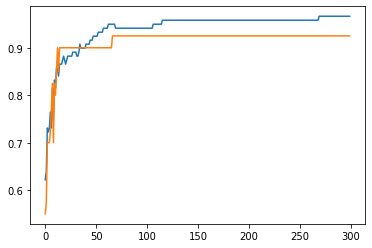

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [16]:
sc = sgdc( tol=None, random_state=42, max_iter=100)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))


0.9495798319327731
